# Python Libraries 1

_September 16, 2020_ 

Agenda today:
- Introduction to Numpy: array math
- Introduction to Pandas: importing, indexing, and math

In [1]:
!pip install pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part I. Numpy
The basic data structure that exist in numpy is called numpy arrays. NP arrays are very similar to python lists. The __difference__ between a python list and a Numpy array is that list can only a mix of data types but array can only contain the same data type.

But what is the benefits of using NumPy array instead of the base python lists?
- Speed 
- Broadcasting Property

In [3]:
names_list=['Bob','John','Sally']
names_array=np.char.array(['Bob','John','Sally']) #use numpy.array for numbers and numpy.char.array for strings
print(names_list)
print(names_array)

['Bob', 'John', 'Sally']
['Bob' 'John' 'Sally']


In [38]:
import time

size_of_seq = 100000

def pure_python_version():
    tic = time.time()
    X = range(size_of_seq)
    Y = range(size_of_seq)
    Z = [X[i] + Y[i] for i in range(len(X)) ]
    toc = time.time()
    return toc - tic

def numpy_version():
    tic = time.time()
    X = np.arange(size_of_seq)
    Y = np.arange(size_of_seq)
    Z = X + Y 
    toc = time.time()
    return toc - tic


t1 = pure_python_version()
t2 = numpy_version()
print("python: " + str(t1), "numpy: "+ str(t2))
print("Numpy is in this example " + str(t1/t2) + " times faster!")

python: 0.03030991554260254 numpy: 0.001065969467163086
Numpy is in this example 28.43413106687542 times faster!


In [40]:
## broadcasting and array math

np.array([2,3,4,6]) * 5


array([10, 15, 20, 30])

In [41]:
li = [2,3,4,6]
li * 5

[2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6]

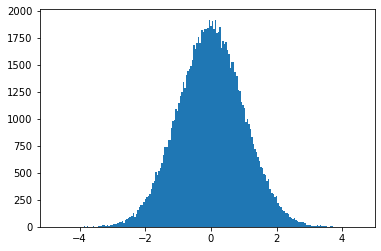

In [43]:
## simulation with numpy - in normal distribution 
rand = np.random.randn(100000);
plt.hist(rand, bins = 200);

There are many other wonderous things numpy can do, you will encounter them later in the course of the program. 

## Part II. Pandas
Pandas stand for paneled data, and it is the most popular library for data scientists to manipulate, clean, and organize dataset in Python. The most fundamental data structure that exists in Pandas is called **DataFrames**. 

In [45]:
## importing data and look at optional parameters
df = pd.read_csv('auto-mpg.csv')
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


In [48]:
# examine and read the data

In [49]:
# examine the information in this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [53]:
df.index

RangeIndex(start=0, stop=398, step=1)

In [54]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [55]:
# talk about series and dataframe 
type(df)

pandas.core.frame.DataFrame

In [58]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [56]:
type(df.mpg)

pandas.core.series.Series

In [57]:
# series - one dimensional object 
df.mpg

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [ ]:
# indexing and subsetting 

# index by values (loc and iloc i as in index) location


In [62]:
df.loc[2, 'horsepower'] #row name, column name

'150'

In [63]:
df.loc[4, 'car name']

'ford torino'

In [66]:
df.iloc[4,8] #gave the number for both

'ford torino'

In [69]:
# 2nd row - 10th row, first three columns 
# slice both the row and the column
# use 11 because it is not inclusive - no start for 0
df.iloc[2:11, :3]

,mpg,cylinders,displacement
2,18.0,8,318.0
3,16.0,8,304.0
4,17.0,8,302.0
5,15.0,8,429.0
6,14.0,8,454.0
7,14.0,8,440.0
8,14.0,8,455.0
9,15.0,8,390.0
10,15.0,8,383.0


In [73]:
# want weight greater than 3000
weight_greater_than_3000 = df[df.weight > 3000] # pass it in

In [77]:
weight_greater_than_3000.iloc[:3]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [82]:
# examine whether we have missing value - it could really affect the data!
df.isnull().sum() # .any() at the end for bool

False

In [85]:
# exercise - want weight greater than 3000 and mpg less than 18 
# wrap in () to spearate the conditionals

df[(df.weight > 3000) & (df.mpg <18)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
...,...,...,...,...,...,...,...,...,...
286,17.6,8,302.0,129,3725,13.4,79,1,ford ltd landau
287,16.5,8,351.0,138,3955,13.2,79,1,mercury grand marquis
289,16.9,8,350.0,155,4360,14.9,79,1,buick estate wagon (sw)
290,15.5,8,351.0,142,4054,14.3,79,1,ford country squire (sw)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [99]:
# exercise - get the cars that are heavier than 3000 but has a horsepower less than 150 

# change horsepower 

df.replace('?', 0)

# df.horsepower.astype('float64')

df.horsepower = df.horsepower.astype(str).astype(float)


# df[(df.weight > 3000) & (df.horsepower > 150)]
# df[(df.weight > 3000) & (df.horsepower.astype('int64', copy=False) > 150)]



# should be 150 cars that satisfy the criteria 

ValueError: could not convert string to float: '?'

In [ ]:
# seems like we have a problem! Can we try to debug this?

In [ ]:
# get rid of anomaly


In [ ]:
# exercise - get a list of car name where the mpg is less than 18 and weight is greater than 3500
